# PySimPace: Machine Learning Integration Tutorial

This notebook demonstrates how to use PySimPace to:

✅ Generate paired (clean, motion-corrupted) MRI data  
✅ Prepare datasets for deep learning pipelines  
✅ Load data with a standard PyTorch Dataset  
✅ Visualize the output  

---

PySimPace supports both **structural MRI (3D)** and **fMRI (4D)** motion simulation.  
In this tutorial, we will generate a dataset for structural MRI.

---

👉 The generated data is ideal for training models such as:
- Motion correction U-Nets
- Artifact detection classifiers
- Segmentation models robust to motion

---


In [2]:
# If using locally:
# pip install -e .

# If PySimPace is already installed:
# pip install pysimpace

In [16]:
! pip install py-simpace

  Attempting uninstall: py-simpace
    Found existing installation: py-simpace 2.0.0
    Uninstalling py-simpace-2.0.0:
      Successfully uninstalled py-simpace-2.0.0


In [2]:
import os
from pysimpace.ml import generate_training_pairs, MRIPairedDataset

In [3]:
# Paths (adjust these as needed)
clean_dir = os.path.join("path_to_clean_data")
output_dir = os.path.join("errored")

print("Clean data folder:", clean_dir)
print("Output folder:", output_dir)

Clean data folder: clean
Output folder: errored


In [ ]:
generate_training_pairs(
    clean_dir=clean_dir,
    output_dir=output_dir,
    n_samples=5,  # start small for test
    artifact_configs=None,   # use default
    structural=True,
    use_blended=True,
    save_format='nifti',
    seed=42
)

Generating pairs:   0%|                                                                                       | 0/5 [00:00<?, ?it/s]

In [4]:
import glob

clean_files = glob.glob(os.path.join(output_dir, "clean", "*.nii.gz"))
corrupted_files = glob.glob(os.path.join(output_dir, "corrupted", "*.nii.gz"))

print(f"Found {len(clean_files)} clean images")
print(f"Found {len(corrupted_files)} corrupted images")

# Show a few file paths
clean_files[:3], corrupted_files[:3]

Found 5 clean images
Found 5 corrupted images


(['errored\\clean\\clean_0000.nii.gz',
  'errored\\clean\\clean_0001.nii.gz',
  'errored\\clean\\clean_0002.nii.gz'],
 ['errored\\corrupted\\corrupted_0000.nii.gz',
  'errored\\corrupted\\corrupted_0001.nii.gz',
  'errored\\corrupted\\corrupted_0002.nii.gz'])

In [5]:
# Load Data
dataset = MRIPairedDataset(os.path.join(output_dir, "pairs.csv"))

print(f"Dataset size: {len(dataset)} samples")

# Load first sample
clean_img, corrupted_img = dataset[0]
print("Clean image shape:", clean_img.shape)
print("Corrupted image shape:", corrupted_img.shape)

Dataset size: 5 samples
Clean image shape: torch.Size([1, 224, 224, 160])
Corrupted image shape: torch.Size([1, 224, 224, 160])


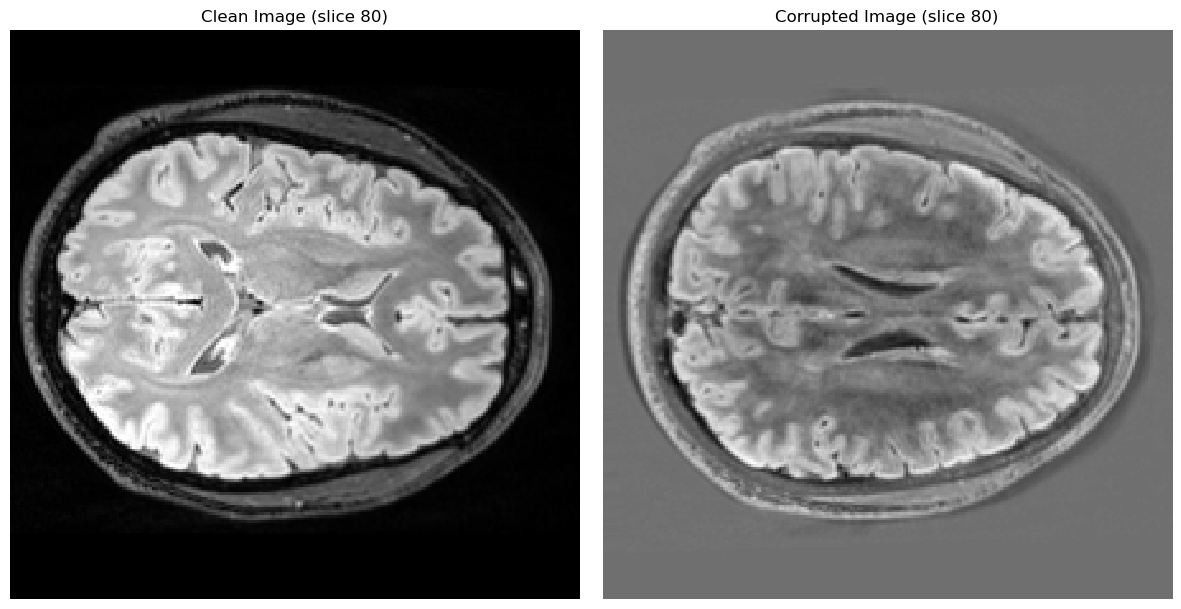

In [6]:
# Add this at the top of your notebook cell to avoid MKL crash
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# Standard imports
import numpy as np
import torch
import matplotlib.pyplot as plt
import gc

# Optional: clear unused memory if you ran large models before
gc.collect()

# Assuming clean_img and corrupted_img are already loaded as PyTorch tensors
# Safe conversion to numpy for plotting
clean_np = clean_img.squeeze().cpu().numpy().astype(np.float32)
corrupted_np = corrupted_img.squeeze().cpu().numpy().astype(np.float32)

# Select central slice
slice_idx = clean_np.shape[-1] // 2

# Create figure
plt.figure(figsize=(12, 6))

# Plot clean image
plt.subplot(1, 2, 1)
plt.imshow(clean_np[:, :, slice_idx], cmap='gray', interpolation='nearest')
plt.title(f"Clean Image (slice {slice_idx})")
plt.axis('off')

# Plot corrupted image
plt.subplot(1, 2, 2)
plt.imshow(corrupted_np[:, :, slice_idx], cmap='gray', interpolation='nearest')
plt.title(f"Corrupted Image (slice {slice_idx})")
plt.axis('off')

# Final layout + show
plt.tight_layout()
plt.show()

# Next Steps

✅ You have now generated a motion-corrupted dataset.  
✅ You can now use this dataset to train your deep learning models!

### Possible use cases:

- Motion correction → supervised U-Net  
- Artifact detection → classifier  
- Segmentation → test models under motion corruption  
- General robustness improvement

### Example training loop:

```python
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for clean_batch, corrupted_batch in dataloader:
    # Feed to your model
    pass